Neural Networks and Deep Learning - 1st Project

In [1]:
# %reset 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import seaborn as sns
import scipy.io as sio
import time
from keras import  layers, models, Model
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import skew, kurtosis, entropy
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

(x1, y1), (x2, y2) = cifar10.load_data()

In [2]:
Ntrain = 50000  # Number of training samples
Ntest = 10000   # Number of testing samples

x1, y1 = x1[:Ntrain], y1[:Ntrain]
x2, y2 = x2[:Ntest], y2[:Ntest]

# Pixel normalization
x1norm ,x2norm = x1/255.0, x2/255.0

# Skewness, Kurtosis, Entropy of each channel and Bispectrum of grayscale images
train_stats = np.load('train_skew_kurt_entr.npy')[:Ntrain]
test_stats = np.load('test_skew_kurt_entr.npy')[:Ntest]
bispectrum_train = pd.read_excel('C:/Users/samag/OneDrive/Υπολογιστής/9o Εξάμηνο/Neural Networks - Deep Learning/Exercises/ex1/Matlab/train_bispectrum_stats_new.xlsx')[:Ntrain]
bispectrum_test = pd.read_excel('C:/Users/samag/OneDrive/Υπολογιστής/9o Εξάμηνο/Neural Networks - Deep Learning/Exercises/ex1/Matlab/test_bispectrum_stats_new.xlsx')[:Ntest]
x1statistics = np.concatenate((train_stats, bispectrum_train), axis=1)
x2statistics = np.concatenate((test_stats, bispectrum_test), axis=1)

x1skew, x2skew = x1statistics[:,:3], x2statistics[:,:3]
x1kurt, x2kurt = x1statistics[:,3:6], x2statistics[:,3:6]
x1entr, x2entr = x1statistics[:,6:9], x2statistics[:,6:9]
x1bispec, x2bispec = x1statistics[:,9:12], x2statistics[:,9:12]


# Central Image Region
x1center = x1norm[:, 8:24, 8:24, :]
x2center = x2norm[:, 8:24, 8:24, :]


# Conversion to grayscale
x1gray = np.zeros((x1norm.shape[0], x1norm.shape[1], x1norm.shape[2]))
x2gray = np.zeros((x2norm.shape[0], x2norm.shape[1], x2norm.shape[2]))
for i in range(Ntrain):
        x1gray[i] = 0.2989*x1norm[i,:,:,0]+0.5870*x1[i,:,:,1]+0.1140*x1[i,:,:,2]

for i in range(Ntest):
        x2gray[i] = 0.2989 * x2norm[i,:,:,0] + 0.5870 * x2norm[i,:,:,1] + 0.1140 * x2norm[i,:,:,2]

x1grayfl = x1gray.reshape(Ntrain, 1024)
x2grayfl = x2gray.reshape(Ntest, 1024)
x1grayy = np.expand_dims(x1gray, axis=-1)
x2grayy = np.expand_dims(x2gray, axis=-1)

x1normfl = x1norm.reshape(Ntrain, 3072)
x2normfl = x2norm.reshape(Ntest, 3072)

x1centerfl = x1center.reshape(Ntrain, 768)
x2centerfl = x2center.reshape(Ntest, 768)


# PCA
pca = PCA(n_components=1000)  
x1normpca = pca.fit_transform(x1normfl)
x2normpca = pca.fit_transform(x2normfl)



classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
y1ohc = tf.keras.utils.to_categorical(y1, 10)
y2ohc = tf.keras.utils.to_categorical(y2, 10)

SAM12 - Original

Epoch 1/60


c:\Users\samag\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['sam12_cnn_input', 'sam12_skew', 'sam12_kurt', 'sam12_entr', 'sam12_bispec']. Received: the structure of inputs=('*', '*', '*', '*', '*')
  warnings.warn(


391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 86ms/step - accuracy: 0.2544 - loss: 2.1717
Epoch 2/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.4694 - loss: 1.4390
Epoch 3/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.5590 - loss: 1.2191
Epoch 4/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.6143 - loss: 1.0714
Epoch 5/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 86ms/step - accuracy: 0.6553 - loss: 0.9731
Epoch 6/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.6799 - loss: 0.9040
Epoch 7/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 86ms/step - accuracy: 0.7017 - loss: 0.8412
Epoch 8/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.7309 - loss: 0.7606
Epoch 9/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.7476 - loss: 0.7199
Epoch 10/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.7583 - loss: 0.6836
Epoch 11/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.7758 - loss: 0.6367
Epoch 12/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 

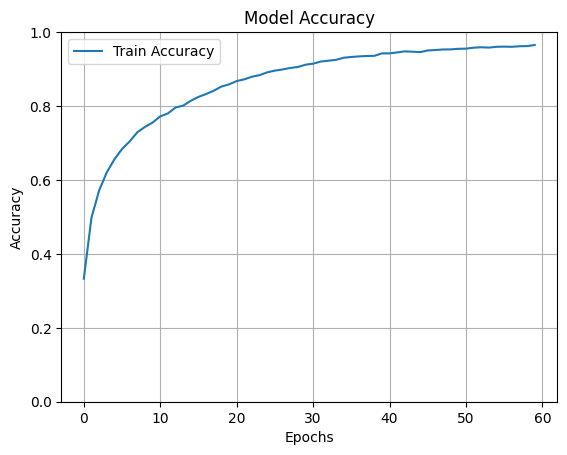

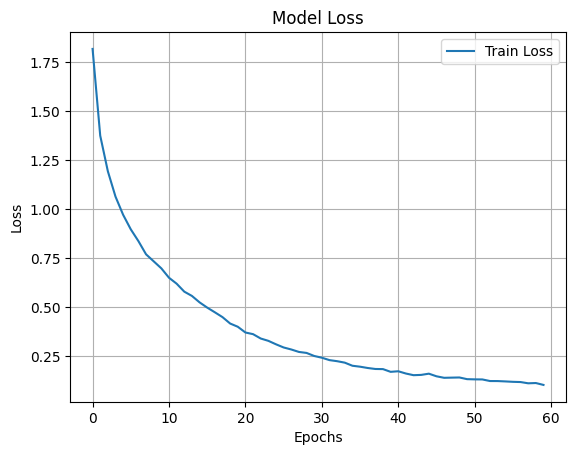

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


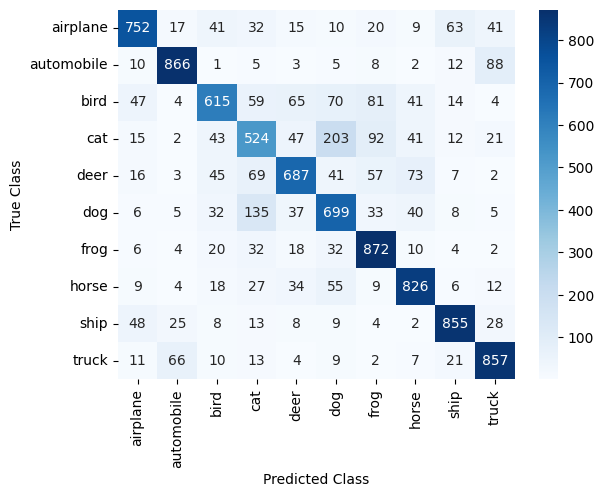

In [ ]:

sam12_cnn_input = layers.Input(shape=(32, 32, 3), name="sam12_cnn_input") #CNN input

sam12_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),  
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),  
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),  
    layers.Dropout(0.4),
    layers.Flatten(),
])
sam12_cnn_output = sam12_cnn(sam12_cnn_input)


sam12_mlp1_input = layers.Input(shape=(x1skew.shape[1],), name='sam12_skew') #MLP1 input
sam12_mlp1 = models.Sequential([
 layers.Dense(128, activation='relu'),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='relu')
])
sam12_mlp1_output = sam12_mlp1(sam12_mlp1_input)

sam12_mlp2_input = layers.Input(shape=(x1kurt.shape[1],), name='sam12_kurt') #MLP2 input
sam12_mlp2 = models.Sequential([
 layers.Dense(128, activation='relu'),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='relu')
])
sam12_mlp2_output = sam12_mlp2(sam12_mlp2_input)


sam12_mlp3_input = layers.Input(shape=(x1entr.shape[1],), name='sam12_entr') #MLP3 input
sam12_mlp3 = models.Sequential([
 layers.Dense(128, activation='relu'),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='relu')
])
sam12_mlp3_output = sam12_mlp3(sam12_mlp3_input)


sam12_mlp4_input = layers.Input(shape=(x1bispec.shape[1],), name='sam12_bispec') #MLP4 input
sam12_mlp4 = models.Sequential([
 layers.Dense(128, activation='relu'),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='relu')
])
sam12_mlp4_output = sam12_mlp4(sam12_mlp4_input)



sam12_mlp5_input = layers.Concatenate()([sam12_cnn_output, sam12_mlp1_output, sam12_mlp2_output, sam12_mlp3_output, sam12_mlp4_output]) #MLP5 input
sam12_mlp5 = models.Sequential([
 layers.Dense(128, activation='relu'),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='softmax')
])
sam12_mlp5_output = sam12_mlp5(sam12_mlp5_input)


# Compile model
sam12 = Model(inputs=[sam12_cnn_input, sam12_mlp1_input, sam12_mlp2_input, sam12_mlp3_input, sam12_mlp4_input], outputs=sam12_mlp5_output)
sam12.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.01),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

sam12st = time.time()

# model train
history12 = sam12.fit(
    [x1norm, x1skew, x1kurt, x1entr, x1bispec], y1ohc,
    epochs=60,
    batch_size=128
)
sam12et = time.time()
sam12time = sam12et-sam12st
print(f"Response Time : {sam12time:.2f}")


# model test
sam12_test_loss, sam12_test_accuracy = sam12.evaluate([x2norm, x2skew, x2kurt, x2entr, x2bispec], y2ohc)
print(f"Test loss: {sam12_test_loss:.4f}, Test accuracy: {sam12_test_accuracy:.4f}")



# Plots:
# accuracy
plt.plot(history12.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()

# loss
plt.plot(history12.history['loss'], label='Train Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Confusion Matrix
sam12_predictions = sam12.predict([x2norm, x2skew, x2kurt, x2entr, x2bispec])
y2pred = np.argmax(sam12_predictions, axis=1)
conf_matrix = confusion_matrix(y2, y2pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('SAM12 Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


SAM12 - 1st edition (SGD optimizer)

Epoch 1/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 82ms/step - accuracy: 0.1265 - loss: 2.2930
Epoch 2/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.1998 - loss: 2.2139
Epoch 3/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 85ms/step - accuracy: 0.2732 - loss: 2.0061
Epoch 4/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 85ms/step - accuracy: 0.3217 - loss: 1.8826
Epoch 5/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 94ms/step - accuracy: 0.3681 - loss: 1.7609
Epoch 6/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.4083 - loss: 1.6579
Epoch 7/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 90ms/step - accuracy: 0.4371 - loss: 1.5741
Epoch 8/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.4540 - loss: 1.5152
Epoch 9/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.4734 - loss: 1.4667
Epoch 10/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 96ms/step - accuracy: 0.4859 - loss: 1.4289
Epoch 11/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 92ms/step - accuracy: 0.5027 - loss: 1.3871
Epoch 12/60
391/391 ━━━━━━━━━━

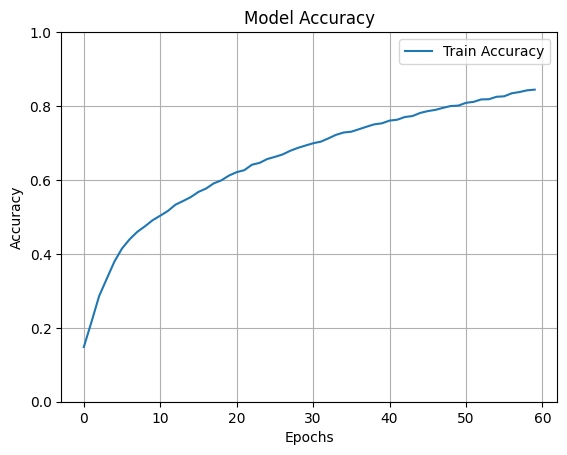

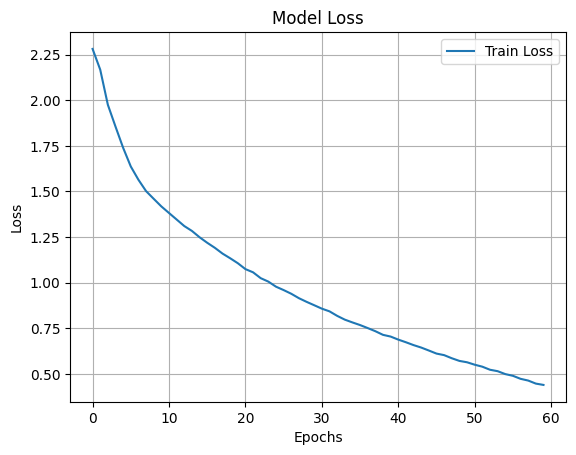

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


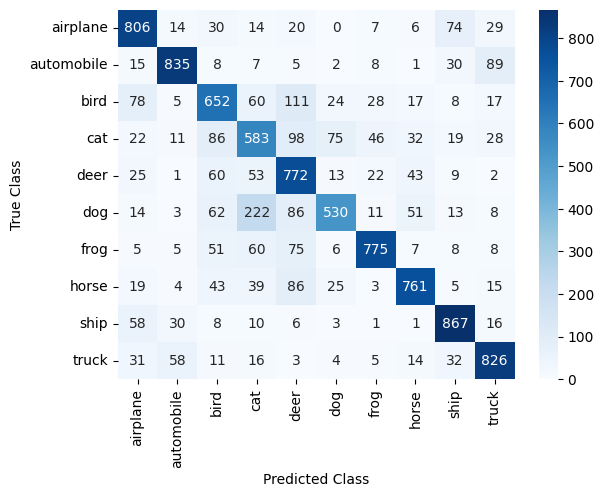

In [ ]:
sam12_a_cnn_input = layers.Input(shape=(32, 32, 3), name="sam12_a_cnn_input") #CNN input

sam12_a_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),  
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),  
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),  
    layers.Dropout(0.4),
    layers.Flatten(),
])
sam12_a_cnn_output = sam12_a_cnn(sam12_a_cnn_input)


sam12_a_mlp1_input = layers.Input(shape=(x1skew.shape[1],), name='sam12_a_skew') #MLP1 input
sam12_a_mlp1 = models.Sequential([
 layers.Dense(128, activation='relu'),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='relu')
])
sam12_a_mlp1_output = sam12_a_mlp1(sam12_a_mlp1_input)

sam12_a_mlp2_input = layers.Input(shape=(x1kurt.shape[1],), name='sam12_a_kurt') #MLP2 input
sam12_a_mlp2 = models.Sequential([
 layers.Dense(128, activation='relu'),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='relu')
])
sam12_a_mlp2_output = sam12_a_mlp2(sam12_a_mlp2_input)


sam12_a_mlp3_input = layers.Input(shape=(x1entr.shape[1],), name='sam12_a_entr') #MLP3 input
sam12_a_mlp3 = models.Sequential([
 layers.Dense(128, activation='relu'),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='relu')
])
sam12_a_mlp3_output = sam12_a_mlp3(sam12_a_mlp3_input)


sam12_a_mlp4_input = layers.Input(shape=(x1bispec.shape[1],), name='sam12_a_bispec') #MLP4 input
sam12_a_mlp4 = models.Sequential([
 layers.Dense(128, activation='relu'),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='relu')
])
sam12_a_mlp4_output = sam12_a_mlp4(sam12_a_mlp4_input)



sam12_a_mlp5_input = layers.Concatenate()([sam12_a_cnn_output, sam12_a_mlp1_output, sam12_a_mlp2_output, sam12_a_mlp3_output, sam12_a_mlp4_output]) #MLP5 input
sam12_a_mlp5 = models.Sequential([
 layers.Dense(128, activation='relu'),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='softmax')
])
sam12_a_mlp5_output = sam12_a_mlp5(sam12_a_mlp5_input)


# Compile model
sam12_a = Model(inputs=[sam12_a_cnn_input, sam12_a_mlp1_input, sam12_a_mlp2_input, sam12_a_mlp3_input, sam12_a_mlp4_input], outputs=sam12_a_mlp5_output)
sam12_a.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


sam12_ast = time.time()
# model train
history12a = sam12_a.fit(
    [x1norm, x1skew, x1kurt, x1entr, x1bispec], y1ohc,
    epochs=60,
    batch_size=128
)
sam12_aet = time.time()
sam12_atime = sam12_aet-sam12_ast
print(f"Response Time : {sam12_atime:.2f}")


# model test
sam12_a_test_loss, sam12_a_test_accuracy = sam12_a.evaluate([x2norm, x2skew, x2kurt, x2entr, x2bispec], y2ohc)
print(f"Test loss: {sam12_a_test_loss:.4f}, Test accuracy: {sam12_a_test_accuracy:.4f}")



# Plots:
# accuracy
plt.plot(history12a.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()

# loss
plt.plot(history12a.history['loss'], label='Train Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Confusion Matrix
sam12_a_predictions = sam12_a.predict([x2norm, x2skew, x2kurt, x2entr, x2bispec])
y2pred_a = np.argmax(sam12_a_predictions, axis=1)
conf_matrix = confusion_matrix(y2, y2pred_a)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('SAM12a Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

SAM12 - 2nd edition 

Epoch 1/60


c:\Users\samag\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['sam12_b_cnn_input', 'sam12_b_skew', 'sam12_b_kurt', 'sam12_b_entr', 'sam12_b_bispec']. Received: the structure of inputs=('*', '*', '*', '*', '*')
  warnings.warn(


391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - accuracy: 0.1691 - loss: 2.2975
Epoch 2/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 94ms/step - accuracy: 0.2882 - loss: 1.8287
Epoch 3/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 93ms/step - accuracy: 0.3739 - loss: 1.6323
Epoch 4/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 93ms/step - accuracy: 0.4435 - loss: 1.4954
Epoch 5/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 93ms/step - accuracy: 0.5115 - loss: 1.3633
Epoch 6/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 94ms/step - accuracy: 0.5404 - loss: 1.2897
Epoch 7/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 93ms/step - accuracy: 0.5764 - loss: 1.2099
Epoch 8/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.6070 - loss: 1.1437
Epoch 9/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 94ms/step - accuracy: 0.6234 - loss: 1.0867
Epoch 10/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.6402 - loss: 1.0573
Epoch 11/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 95ms/step - accuracy: 0.6550 - loss: 1.0189
Epoch 12/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 

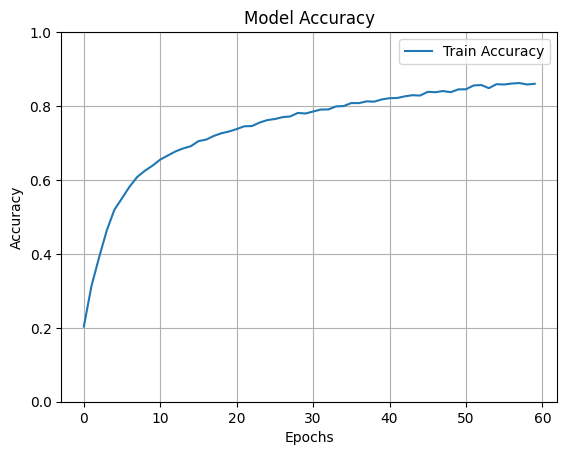

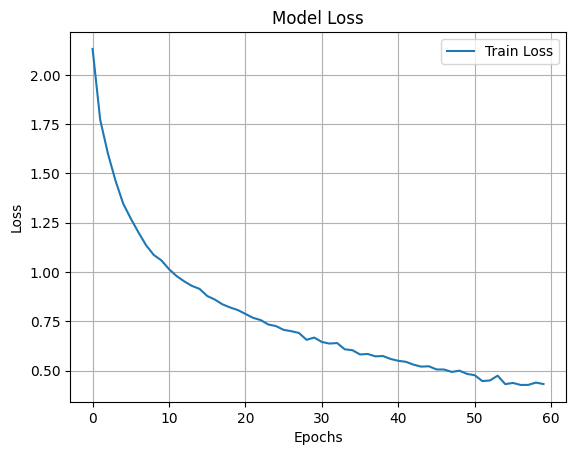

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


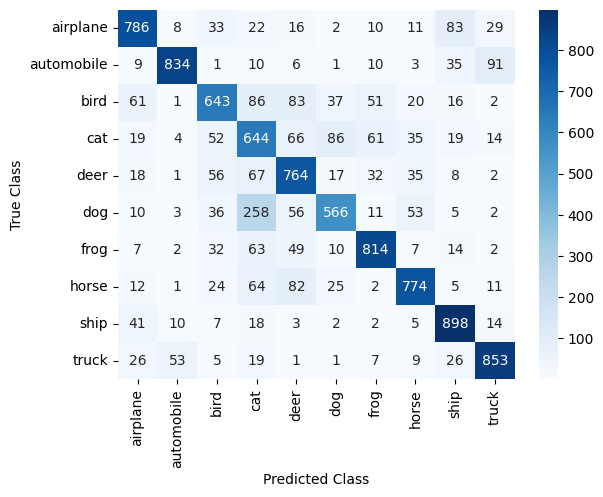

In [ ]:
sam12_b_cnn_input = layers.Input(shape=(32, 32, 3), name="sam12_b_cnn_input") #CNN input

sam12_b_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),  
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),  
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),  
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),  
    layers.Dropout(0.4),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),  
    layers.Dropout(0.4),
    layers.Flatten(),
])
sam12_b_cnn_output = sam12_b_cnn(sam12_b_cnn_input)


sam12_b_mlp1_input = layers.Input(shape=(x1skew.shape[1],), name='sam12_b_skew') #MLP1 input
sam12_b_mlp1 = models.Sequential([
 layers.Dense(128, activation='relu'),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='relu')
])
sam12_b_mlp1_output = sam12_b_mlp1(sam12_b_mlp1_input)

sam12_b_mlp2_input = layers.Input(shape=(x1kurt.shape[1],), name='sam12_b_kurt') #MLP2 input
sam12_b_mlp2 = models.Sequential([
 layers.Dense(128, activation='relu'),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='relu')
])
sam12_b_mlp2_output = sam12_b_mlp2(sam12_b_mlp2_input)


sam12_b_mlp3_input = layers.Input(shape=(x1entr.shape[1],), name='sam12_b_entr') #MLP3 input
sam12_b_mlp3 = models.Sequential([
 layers.Dense(128, activation='relu'),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='relu')
])
sam12_b_mlp3_output = sam12_b_mlp3(sam12_b_mlp3_input)


sam12_b_mlp4_input = layers.Input(shape=(x1bispec.shape[1],), name='sam12_b_bispec') #MLP4 input
sam12_b_mlp4 = models.Sequential([
 layers.Dense(128, activation='relu'),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='relu')
])
sam12_b_mlp4_output = sam12_b_mlp4(sam12_b_mlp4_input)



sam12_b_mlp5_input = layers.Concatenate()([sam12_b_cnn_output, sam12_b_mlp1_output, sam12_b_mlp2_output, sam12_b_mlp3_output, sam12_b_mlp4_output]) #MLP5 input
sam12_b_mlp5 = models.Sequential([
 layers.Dense(256, activation='relu'),
 layers.Dense(128, activation='relu'),
 layers.Dense(64, activation='relu'),
 layers.Dense(32, activation='relu'),
 layers.Dropout(0.2),
 layers.Dense(10, activation='softmax')
])
sam12_b_mlp5_output = sam12_b_mlp5(sam12_b_mlp5_input)


# Compile model
sam12_b = Model(inputs=[sam12_b_cnn_input, sam12_b_mlp1_input, sam12_b_mlp2_input, sam12_b_mlp3_input, sam12_b_mlp4_input], outputs=sam12_b_mlp5_output)
sam12_b.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.01),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


sam12_bst = time.time()
# model train
history12b = sam12_b.fit(
    [x1norm, x1skew, x1kurt, x1entr, x1bispec], y1ohc,
    epochs=60,
    batch_size=128
)
sam12_bet = time.time()
sam12_btime = sam12_bet-sam12_bst
print(f"Response Time : {sam12_btime:.2f}")


# model test
sam12_b_test_loss, sam12_b_test_accuracy = sam12_b.evaluate([x2norm, x2skew, x2kurt, x2entr, x2bispec], y2ohc)
print(f"Test loss: {sam12_b_test_loss:.4f}, Test accuracy: {sam12_b_test_accuracy:.4f}")


# Plots:
# accuracy
plt.plot(history12b.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()

# loss
plt.plot(history12b.history['loss'], label='Train Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Confusion Matrix
sam12_b_predictions = sam12_b.predict([x2norm, x2skew, x2kurt, x2entr, x2bispec])
y2pred_b = np.argmax(sam12_b_predictions, axis=1)
conf_matrix = confusion_matrix(y2, y2pred_b)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('SAM12b Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


SAM12 - 3rd edition

Epoch 1/60


c:\Users\samag\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['sam12_c_cnn_input', 'sam12_c_skew', 'sam12_c_kurt', 'sam12_c_entr', 'sam12_c_bispec']. Received: the structure of inputs=('*', '*', '*', '*', '*')
  warnings.warn(


391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 83ms/step - accuracy: 0.1011 - loss: 2.3052
Epoch 2/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.1088 - loss: 2.3020
Epoch 3/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.1096 - loss: 2.3000
Epoch 4/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.1135 - loss: 2.2985
Epoch 5/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.1196 - loss: 2.2969
Epoch 6/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 91ms/step - accuracy: 0.1268 - loss: 2.2949
Epoch 7/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.1331 - loss: 2.2930
Epoch 8/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.1372 - loss: 2.2901
Epoch 9/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step - accuracy: 0.1420 - loss: 2.2875
Epoch 10/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step - accuracy: 0.1452 - loss: 2.2846
Epoch 11/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step - accuracy: 0.1547 - loss: 2.2793
Epoch 12/60
391/391 ━━━━━━━━━━━━━━━━━━━━ 

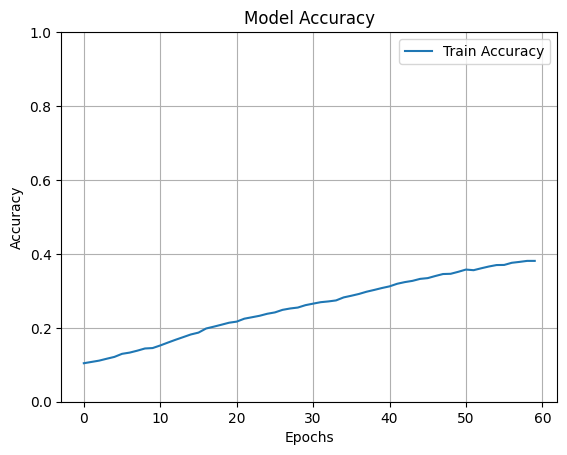

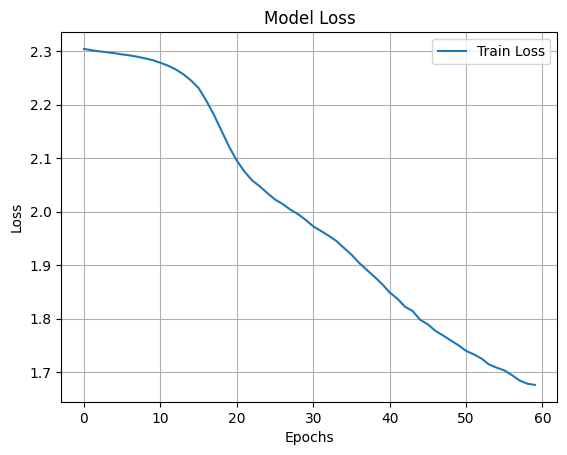

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


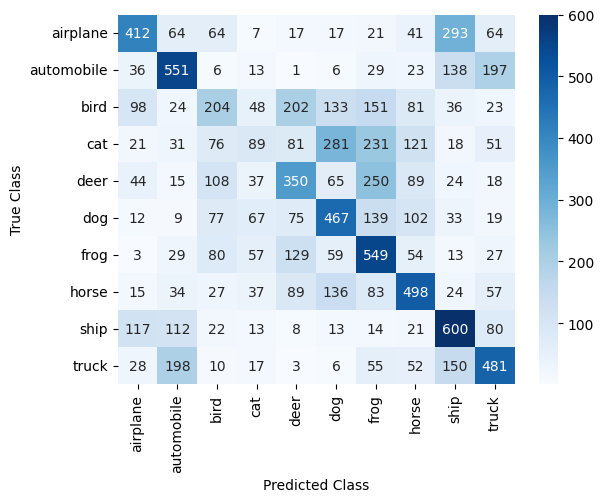

In [ ]:
sam12_c_cnn_input = layers.Input(shape=(32, 32, 3), name="sam12_c_cnn_input") #CNN input

sam12_c_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),  
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),  
    layers.MaxPooling2D((2, 2)), 
    layers.Dropout(0.4),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),  
    layers.Dropout(0.4),
    layers.Flatten(),
])
sam12_c_cnn_output = sam12_c_cnn(sam12_c_cnn_input)


sam12_c_mlp1_input = layers.Input(shape=(x1skew.shape[1],), name='sam12_c_skew') #MLP1 input
sam12_c_mlp1 = models.Sequential([
 layers.Dense(128, activation='relu'),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='relu')
])
sam12_c_mlp1_output = sam12_c_mlp1(sam12_c_mlp1_input)

sam12_c_mlp2_input = layers.Input(shape=(x1kurt.shape[1],), name='sam12_c_kurt') #MLP2 input
sam12_c_mlp2 = models.Sequential([
 layers.Dense(128, activation='relu'),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='relu')
])
sam12_c_mlp2_output = sam12_c_mlp2(sam12_c_mlp2_input)


sam12_c_mlp3_input = layers.Input(shape=(x1entr.shape[1],), name='sam12_c_entr') #MLP3 input
sam12_c_mlp3 = models.Sequential([
 layers.Dense(128, activation='relu'),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='relu')
])
sam12_c_mlp3_output = sam12_c_mlp3(sam12_c_mlp3_input)


sam12_c_mlp4_input = layers.Input(shape=(x1bispec.shape[1],), name='sam12_c_bispec') #MLP4 input
sam12_c_mlp4 = models.Sequential([
 layers.Dense(128, activation='relu'),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='relu')
])
sam12_c_mlp4_output = sam12_c_mlp4(sam12_c_mlp4_input)



sam12_c_mlp5_input = layers.Concatenate()([sam12_c_cnn_output, sam12_c_mlp1_output, sam12_c_mlp2_output, sam12_c_mlp3_output, sam12_c_mlp4_output]) #MLP5 input
sam12_c_mlp5 = models.Sequential([
 layers.Dense(128, activation='relu'),
 layers.Dense(64, activation='relu'),
 layers.Dropout(0.2),
 layers.Dense(10, activation='softmax')
])
sam12_c_mlp5_output = sam12_c_mlp5(sam12_c_mlp5_input)


# Compile model
sam12_c = Model(inputs=[sam12_c_cnn_input, sam12_c_mlp1_input, sam12_c_mlp2_input, sam12_c_mlp3_input, sam12_c_mlp4_input], outputs=sam12_c_mlp5_output)
sam12_c.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


sam12_cst = time.time()
# model train
history12c = sam12_c.fit(
    [x1norm, x1skew, x1kurt, x1entr, x1bispec], y1ohc,
    epochs=60,
    batch_size=128
)
sam12_cet = time.time()
sam12_ctime = sam12_cet-sam12_cst
print(f"Response Time : {sam12_ctime:.2f}")


# model test
sam12_c_test_loss, sam12_c_test_accuracy = sam12_c.evaluate([x2norm, x2skew, x2kurt, x2entr, x2bispec], y2ohc)
print(f"Test loss: {sam12_c_test_loss:.4f}, Test accuracy: {sam12_c_test_accuracy:.4f}")


# Plots:
# accuracy
plt.plot(history12c.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()

# loss
plt.plot(history12c.history['loss'], label='Train Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Confusion Matrix
sam12_c_predictions = sam12_c.predict([x2norm, x2skew, x2kurt, x2entr, x2bispec])
y2pred_c = np.argmax(sam12_c_predictions, axis=1)
conf_matrix = confusion_matrix(y2, y2pred_c)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('SAM12c Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


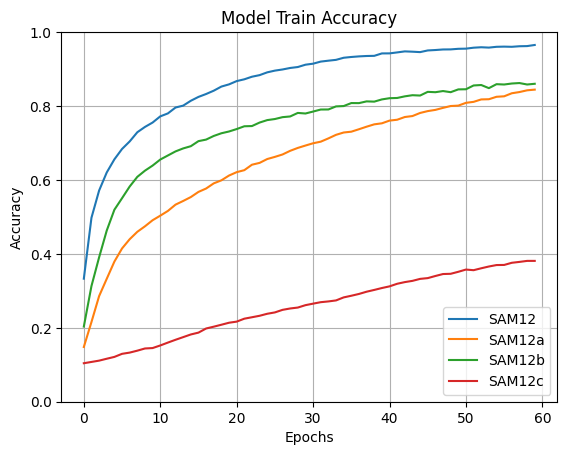

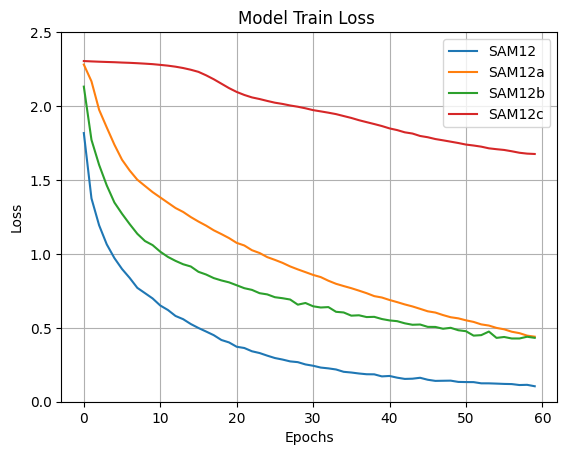

In [17]:

histories = [history12, history12a, history12b, history12c]
model_names = ["SAM12", "SAM12a", "SAM12b", "SAM12c"]

for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f'{model_names[i]}')
plt.title('Model Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.legend()
plt.grid()
plt.show()

for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f'{model_names[i]}')
plt.title('Model Train Loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 2.5)
plt.legend()
plt.grid()
plt.show()

